a valle di un processo di custering graph based tramite gephi appliucando la modularità - seleziono 3 cluster (quelli composti da piu nodi)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('authority-modularity.csv')
df=df.drop(['Label','timeset','Hub'],axis=1)
df.modularity_class.value_counts()

11    455
9     336
4     276
13     57
0      30
12      1
10      1
8       1
7       1
6       1
5       1
3       1
2       1
1       1
Name: modularity_class, dtype: int64

In [2]:
indexNames = df[ (df.modularity_class != 11) & (df.modularity_class != 9) & (df.modularity_class != 4) ].index
df.drop(indexNames , inplace=True)

seleziono cluster 11,9,4

In [3]:
df.modularity_class.value_counts()

11    455
9     336
4     276
Name: modularity_class, dtype: int64

prendo i primi 10 utenti con Authority più alta per ogni cluster

In [4]:
df.head()

,Id,Authority,modularity_class
0,196206592,0.031801,4
1,103245828,0.037196,9
2,14983173,0.036746,4
3,120532998,0.033320,11
4,207669253,0.018614,9


In [5]:
first10_cl11=df[df.modularity_class == 11].sort_values('Authority', ascending=False).head(10)
first10_cl4=df[df.modularity_class == 4].sort_values('Authority', ascending=False).head(10)
first10_cl9=df[df.modularity_class == 9].sort_values('Authority', ascending=False).head(10)

Verifico se siano ancora attivi : suppongo che un utente sia ancora attivo se il profilo è ancora attivo e l'ultimo post risale ad almeno 3 mesi da oggi

In [6]:
utenti_cl11=first10_cl11.Id.tolist()
utenti_cl4=first10_cl4.Id.tolist()
utenti_cl9=first10_cl9.Id.tolist()

In [7]:
import tweepy

ACCESS_TOKEN = '1089903781880434688-SDhXR2aBBr54lZQ8QnPaE4mUR6TrOd'
ACCESS_SECRET = 'D6wHvFEmbL3W0FSP70jxBRpIYs53UGxuQlQ5yHf578ZDt'
CONSUMER_KEY = 'kGR5GYd09tSmQCJeyprOKlKeV'
CONSUMER_SECRET = 'MNeyyl0SkUOGgkIs8kDdZktPi2HCxC7mTv6re4GywsiarZDR3c'


auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
  
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET) 

api = tweepy.API(auth) 

In [10]:
from datetime import timedelta, datetime

lista_utenti=utenti_cl11+utenti_cl4+utenti_cl9


for idx, utente in enumerate(lista_utenti):
    try:
        last_tweet = api.user_timeline(user_id=utente, count=1) 
        created_at = last_tweet[0].created_at
    
        if (created_at > datetime.now() - timedelta(days=90)):
            print('{}: this user is still active: {}\tlast post: {}'.format(idx,utente,created_at))
        else:
            
            if utente in utenti_cl11:
                utenti_cl11.remove(utente)
                print('inactive user {} droppato da lista {} '.format(utente,'cl11'))
            elif utente in utenti_cl4:
                utenti_cl4.remove(utente)
                print('inactive user {} droppato da lista {} '.format(utente,'cl4'))
            else :
                utenti_cl9.remove(utente)
                print('inactive user {} droppato da lista {} '.format(utente,'cl9'))
                
    except Exception as err:
        print(err)
        if utente in utenti_cl11:
            utenti_cl11.remove(utente)
            print('inactive user {} droppato da lista {} '.format(utente,'cl11'))
        elif utente in utenti_cl4: 
            utenti_cl4.remove(utente)
            print('inactive user {} droppato da lista {} '.format(utente,'cl4'))
        else :
            utenti_cl9.remove(utente)
            print('inactive user {} droppato da lista {} '.format(utente,'cl9'))
        continue

Not authorized.
inactive user 123926189 droppato da lista cl11 
1: this user is still active: 113283096	last post: 2019-07-31 06:05:42
2: this user is still active: 52456063	last post: 2019-07-31 02:47:24
3: this user is still active: 18119568	last post: 2019-07-31 07:08:00
4: this user is still active: 14872161	last post: 2019-07-31 05:08:36
5: this user is still active: 10236782	last post: 2019-07-31 03:39:27
inactive user 45762728 droppato da lista cl11 
7: this user is still active: 175339579	last post: 2019-07-31 08:48:25
8: this user is still active: 171656520	last post: 2019-07-31 06:10:31
9: this user is still active: 21765964	last post: 2019-07-31 06:11:49
Not authorized.
inactive user 15773072 droppato da lista cl4 
11: this user is still active: 16252960	last post: 2019-07-31 05:18:43
inactive user 42919671 droppato da lista cl4 
13: this user is still active: 56669858	last post: 2019-06-17 11:09:24
14: this user is still active: 54292369	last post: 2019-07-30 02:04:59
15: t

In [11]:
print(len(utenti_cl11))
print(len(utenti_cl4))
print(len(utenti_cl9))

8
8
9


a questo punto prendo in considerazione solo gli utenti più autorevoli ancora attivi ad oggi e filtro i tweet relativi a questi utenti dal dataset del 2016.

In [62]:
from pymongo import MongoClient

client = MongoClient('localhost', 27017)
db = client['twitter']

colleziono tweet cl11

In [65]:
data = pd.DataFrame(columns=['Tweets'])

for user in utenti_cl11:
    
    print('colleziono tweet utente numero:', user)

    pipeline=[{ "$project": {  "id_user" : 1, "originalTweet" : 1, "hashtag" : 1, "mention" : 1}}, { "$match": {  "id_user" : user} }]

    cursor_list = list(db['tweets'].aggregate(pipeline))

    tweets = pd.DataFrame(cursor_list)
    data=data.append(tweets, sort=True)

dfcl11 = pd.DataFrame(data.originalTweet)
dfcl11

colleziono tweet utente numero: 113283096
colleziono tweet utente numero: 52456063
colleziono tweet utente numero: 18119568
colleziono tweet utente numero: 14872161
colleziono tweet utente numero: 10236782
colleziono tweet utente numero: 175339579
colleziono tweet utente numero: 171656520
colleziono tweet utente numero: 21765964


,originalTweet
0,RT @7thclouds: #小池百合子 #大臣 就任直後 #イージス艦情報横流した側 #...
1,#小池百合子 #大臣 就任直後 #イージス艦情報横流した側 #幸福の科学 #勝共連合 反日「...
2,RT @7thclouds: #小池百合子 #大臣 就任直後 #イージス艦情報横流し 側 #...
3,#小池百合子 #大臣 就任直後 #イージス艦情報横流し 側 #幸福の科学 所謂統一教会系ナチ...
4,RT @7thclouds: @sputnik_jp<#いうこととやること正反対 #小池百合...
5,@sputnik_jp<#いうこととやること正反対 #小池百合子 #大臣 就任直後 #イージ...
6,RT @mgeyst: 【小池新都知事始動】田嶋陽子氏乱入！ 会見場がＴＶタックルの舞台に？...
7,RT @7thclouds: @HuffPostJapan<#都知事選 #小池百合子 #幸福...
8,RT @7thclouds: #都知事選 #小池百合子 #幸福の科学 #核武装 #原発 #細...
9,@HuffPostJapan<#都知事選 #小池百合子 #幸福の科学 #核武装 #原発 #細...


colleziono tweet cl4

In [66]:
del data, tweets

In [67]:
data = pd.DataFrame(columns=['Tweets'])

for user in utenti_cl4:
    
    print('colleziono tweet utente numero:', user)

    pipeline=[{ "$project": {  "id_user" : 1, "originalTweet" : 1, "hashtag" : 1, "mention" : 1}}, { "$match": {  "id_user" : user} }]

    cursor_list = list(db['tweets'].aggregate(pipeline))

    tweets = pd.DataFrame(cursor_list)
    data=data.append(tweets, sort=True)

dfcl4 = pd.DataFrame(data.originalTweet)
dfcl4

colleziono tweet utente numero: 16252960
colleziono tweet utente numero: 56669858
colleziono tweet utente numero: 54292369
colleziono tweet utente numero: 18084838
colleziono tweet utente numero: 41823835
colleziono tweet utente numero: 94853291
colleziono tweet utente numero: 14983173
colleziono tweet utente numero: 15279465


,originalTweet
0,Watching DNC speeches I miss on the Democratic...
1,"RT @CNBCnow: Obama: ""Our power comes from thos..."
2,"RT @WSJPolitics: ""The American Dream is someth..."
3,"RT @HuffPostPol: Obama: ""If you’re serious abo..."
4,"RT @HuffPostPol: Obama: ""What makes us America..."
5,"RT @TheDemocrats: ""I have confidence... that t..."
6,"RT @CNBCnow: Pres. Obama: ""...fascists or comm..."
7,"RT @WSJPolitics: Obama: ""America has changed o..."
8,"RT @markknoller: ""And now I’m ready to pass th..."
9,"RT @arappeport: ""Democracy works, America. You..."


colleziono tweet cl9

In [68]:
del data, tweets

In [69]:
data = pd.DataFrame(columns=['Tweets'])

for user in utenti_cl9:
    
    print('colleziono tweet utente numero:', user)

    pipeline=[{ "$project": {  "id_user" : 1, "originalTweet" : 1, "hashtag" : 1, "mention" : 1}}, { "$match": {  "id_user" : user} }]

    cursor_list = list(db['tweets'].aggregate(pipeline))

    tweets = pd.DataFrame(cursor_list)
    data=data.append(tweets, sort=True)

dfcl9 = pd.DataFrame(data.originalTweet)
dfcl9

colleziono tweet utente numero: 88071033
colleziono tweet utente numero: 113410319
colleziono tweet utente numero: 17383566
colleziono tweet utente numero: 37725640
colleziono tweet utente numero: 29268171
colleziono tweet utente numero: 68163467
colleziono tweet utente numero: 17268481
colleziono tweet utente numero: 212402248
colleziono tweet utente numero: 15700177


,originalTweet
0,RT @weshouldallcare: .@rosierifka @jackiewattl...
1,RT @a3auntie: Democrats are do DISHONEST! http...
2,RT @hrm_1973: @ezralevant They are getting cau...
3,RT @PatDollard: WATCH: Undercover Video Expose...
4,RT @FoxNews: .@IvankaTrump: @realDonaldTrump “...
5,RT @JaniBetancoirt: Obama's government policie...
6,RT @NimbleNavgater: The fact that Twitter has ...
7,RT @the_realBrooks: @Conservative_VW Of course...
8,RT @JohnLibertyUSA: #WrecklessHillary refused ...
9,RT @LUISMPEREZ3: @Mets@Yanks SIX Hits in ONE ...


effettuo LDA-multicore sui tre cluster

In [70]:
from utils import tokenize_and_stem
from nltk.corpus import stopwords

myStopWords=set(stopwords.words('english')+list(['http','https']))

docs = dfcl11.originalTweet

documents = [tokenize_and_stem(s, stopwords=myStopWords) for s in docs]

In [71]:
from gensim import corpora, models, similarities

dictionary = corpora.Dictionary(documents)

In [72]:
corpus = [dictionary.doc2bow(text) for text in documents]

In [73]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model =models.LdaMulticore(corpus, id2word=dictionary, num_topics=num_topics, passes=5, workers=9)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [75]:
limit=6; 
start=2; 
step=1;

model_list, coherence_values = compute_coherence_values(dictionary=dictionary, 
                                                        corpus=corpus, 
                                                        texts=documents, 
                                                        start=start, limit=limit, step=step)

In [77]:
print('Coherence values:\n' )

# Print the coherence scores

x = range(start, limit, step)

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Coherence values:

Num Topics = 2  has Coherence Value of 0.4297
Num Topics = 3  has Coherence Value of 0.3519
Num Topics = 4  has Coherence Value of 0.5491
Num Topics = 5  has Coherence Value of 0.4341


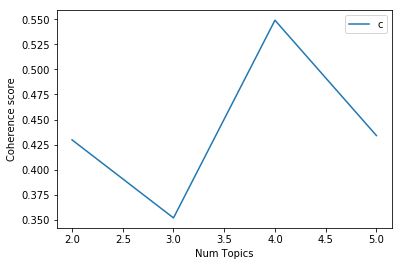

In [78]:
import matplotlib.pyplot as plt

# Show graph

plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# TOPIC cluster 11

In [79]:
lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=3, passes=100, workers=9)


#Show first n important word in the topics:
lda.show_topics(7,5)


----------------------------------------------------------------------------------------------------------------------



[(0,
  '0.014*"https" + 0.006*"retweeted" + 0.005*"police" + 0.004*"auspol" + 0.003*"video"'),
 (1,
  '0.016*"小池百合子" + 0.015*"都知事選" + 0.012*"豊洲市場" + 0.010*"royals" + 0.009*"auspol"'),
 (2,
  '0.026*"trump" + 0.009*"retweeted" + 0.008*"https" + 0.007*"clinton" + 0.005*"donald"')]

# TOPIC cluster 9

In [88]:
from gensim import models


docs = dfcl9.originalTweet

myStopWords1=set(stopwords.words('english')+stopwords.words('spanish')+list(['http','https']))

documents = [tokenize_and_stem(s, stopwords=myStopWords1) for s in docs]

dictionary = corpora.Dictionary(documents)

corpus = [dictionary.doc2bow(text) for text in documents]

lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=3, passes=100, workers=9)


#Show first n important word in the topics:
lda.show_topics(7,5)

[(0,
  '0.020*"trump" + 0.014*"https" + 0.009*"hillary" + 0.008*"clinton" + 0.004*"donald"'),
 (1,
  '0.037*"https" + 0.005*"mais" + 0.004*"jornaloglobo" + 0.004*"earning" + 0.004*"estadao"'),
 (2,
  '0.019*"https" + 0.004*"today" + 0.004*"people" + 0.003*"world" + 0.002*"police"')]

# TOPIC cluster 4

In [80]:
del docs, documents, lda, model_list, coherence_values, dictionary, corpus
gc.collect()

In [84]:
from gensim import models


docs = dfcl4.originalTweet

documents = [tokenize_and_stem(s, stopwords=myStopWords) for s in docs]

dictionary = corpora.Dictionary(documents)

corpus = [dictionary.doc2bow(text) for text in documents]

lda = models.LdaMulticore(corpus, id2word=dictionary, num_topics=3, passes=100, workers=9)


#Show first n important word in the topics:
lda.show_topics(7,5)

[(0,
  '0.018*"https" + 0.003*"help" + 0.003*"indian" + 0.003*"health" + 0.003*"brain"'),
 (1,
  '0.011*"https" + 0.010*"joshestrin" + 0.009*"trump" + 0.008*"promo" + 0.007*"episode"'),
 (2,
  '0.008*"https" + 0.006*"youngglobal" + 0.006*"daily" + 0.005*"thanks" + 0.005*"texas"')]